# Assignment05
## Name : Yeon-Jee Jung
## Student ID : 20142052
## Git URL : https://github.com/YeonjeeJung/assignment05

# Import packages for plotting graphs and manipulating data:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure

# Open the image :

Open the 'cau.jpg' image and convert it to grayscale.

In [2]:
file_image = 'cau.jpg'

im_color = io.imread(file_image)
im_gray = color.rgb2gray(im_color)

Display the color image.

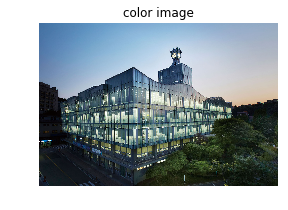

In [3]:
plt.figure(figsize=(5,3))
plt.title('color image')
plt.imshow(im_color)
plt.axis('off')

plt.show()

Display the gray image.

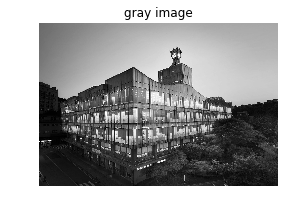

In [4]:
plt.figure(figsize=(5,3))
plt.title('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')

plt.show()

# Compute the gradient for edge detecting :

Compute the $\frac{\partial f}{\partial x}$. It can be computed with the kernel $\begin{bmatrix} -1 & 1 \end{bmatrix}$ by convolution.

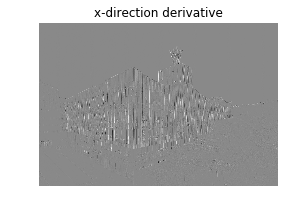

In [5]:
ker_xdir = np.array([[-1,1]])

im_xdir_derivate = signal.convolve2d(im_gray, ker_xdir, mode='same')
plt.figure(figsize=(5,3))
plt.title("x-direction derivative")
plt.imshow(im_xdir_derivate, cmap='gray')
plt.axis('off')

plt.show()

Compute the $\frac{\partial f}{\partial y}$. It can be computed with the kernel $\begin{bmatrix} -1 \\ 1 \end{bmatrix}$ by convolution.

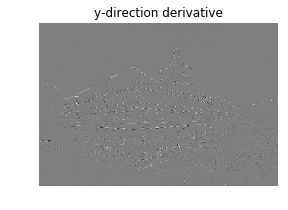

In [6]:
ker_ydir = np.array([[-1],[1]])
#ker_ydir = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

im_ydir_derivate = signal.convolve2d(im_gray, ker_ydir, mode='same')
plt.figure(figsize=(5,3))
plt.title("y-direction derivative")
plt.imshow(im_ydir_derivate, cmap='gray')
plt.axis('off')

plt.show()

Define a function to compute the magnitude of gradient. It can be computed with the form $\sqrt{\frac{\partial f}{\partial x}^2\times \frac{\partial f}{\partial y}^2}$ for each pixels.

In [7]:
def magnitude_grad(xdir_der, ydir_der):
    magnitude = np.sqrt(xdir_der*xdir_der + ydir_der*ydir_der)
    
    return magnitude

Compute the magnitude and show the magnitude image.

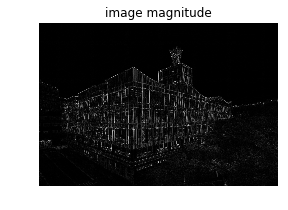

In [8]:
magnitude = magnitude_grad(im_xdir_derivate, im_ydir_derivate)

plt.figure(figsize=(5,3))
plt.title("image magnitude")
plt.imshow(magnitude, cmap='gray')
plt.axis('off')

plt.show()

Define a function to compute direction of gradient. It can be computed with the form $\tan^{-1}\left(\frac{\frac{\partial f}{\partial y}}{\frac{\partial f}{\partial x}}\right)$ for each pixels.

In [9]:
def direction_grad(xdir_der, ydir_der):
    
    # 1e-100 is for the case that xdir_der is zero
    return np.arctan(ydir_der / (xdir_der + 1e-100))

Compute the gradient and show the gradient image.

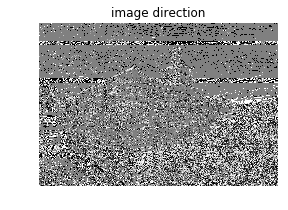

In [10]:
direction = direction_grad(im_xdir_derivate, im_ydir_derivate)

plt.figure(figsize=(5,3))
plt.title("image direction")
plt.imshow(direction, cmap='gray')
plt.axis('off')

plt.show()

# Make a smoothing kernel and my own kernel

Define a smoothing kernel $\begin{bmatrix} 0 && \frac{1}{8} && 0 \\ \frac{1}{8} && \frac{1}{4} && \frac{1}{8} \\ 0 && \frac{1}{8} && 0 \end{bmatrix}$ and do convolution with image.

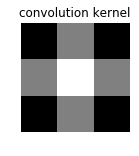

In [11]:
ker = np.array([[0,1/8,0],[1/8,1/4,1/8],[0,1/8,0]]) 
im_conv = signal.convolve2d(im_gray, ker, mode='same') 

plt.figure(figsize=(2,2))
plt.title('convolution kernel')
plt.imshow(ker, cmap='gray')
plt.axis('off')

plt.show()

Show the convoluted image. You can see the image gets little more smoother.

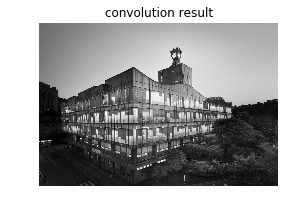

In [12]:
plt.figure(figsize=(5,3))
plt.title('convolution result')
plt.imshow(im_conv, cmap='gray')
plt.axis('off')

plt.show()

Define a smoothing kernel  $\begin{bmatrix} 0 && -1 && 0 \\ -1 && 4 && -1 \\ 0 && -1 && 0 \end{bmatrix}$ (laplacian kernel) and do convolution with image. This kernel is for edge detection.

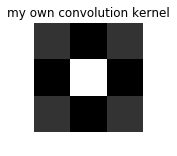

In [13]:
ker_my = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]]) 
im_conv_my = signal.convolve2d(im_gray, ker_my, mode='same') 

plt.figure(figsize=(2,2))
plt.title('my own convolution kernel')
plt.imshow(ker_my, cmap='gray')
plt.axis('off')

plt.show()

Show the convoluted image. You can see the image that similar with the combtnation of $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$. The edges get intensed.

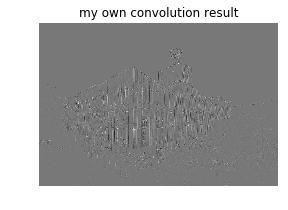

In [14]:
plt.figure(figsize=(5,3))
plt.title('my own convolution result')
plt.imshow(im_conv_my, cmap='gray')
plt.axis('off')

plt.show()